In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("positivosZac.csv",header=0)
df

,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,...,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,CLASIFICACION_FINAL,UCI
0,12,32,1,32,56,2,2020-12-15,2020-12-15,2020-12-15,2,...,2,2,2,2,2,2,1,2,3,2
1,12,32,1,32,36,1,2020-03-03,2020-03-02,9999-99-99,97,...,2,2,2,2,2,2,2,2,1,97
2,12,32,1,32,17,1,2020-03-05,2020-03-03,9999-99-99,97,...,2,2,2,2,2,2,2,2,1,97
3,12,32,1,32,17,1,2020-03-10,2020-03-08,9999-99-99,97,...,2,2,2,2,2,2,2,2,1,97
4,12,32,1,32,17,1,2020-03-10,2020-03-09,9999-99-99,97,...,2,2,2,2,2,2,2,2,1,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64803,4,32,1,32,17,1,2022-01-11,2022-01-08,9999-99-99,97,...,2,2,2,2,2,2,2,2,3,97
64804,4,32,1,32,39,1,2022-01-12,2022-01-09,9999-99-99,97,...,2,2,2,2,2,2,2,2,3,97
64805,4,32,1,32,17,1,2022-01-11,2022-01-07,9999-99-99,97,...,2,2,2,2,2,2,2,2,3,97
64806,4,32,2,32,17,1,2022-02-11,2022-02-07,9999-99-99,97,...,2,2,2,2,2,2,2,1,3,97


## Comparativa entre hombre y mujeres mayores de 40 años


In [3]:
dfhombres=df[(df['EDAD']>=40) & (df['SEXO']==2)]
dfmujeres=df[(df['EDAD']>=40) & (df['SEXO']==1)]
print("Hombres:", len(dfhombres),"|   Mujeres:", len(dfmujeres))

Hombres: 14539 |   Mujeres: 16498


Proporción de muertes en pacientes hospitalizados Hombres y Mujeres

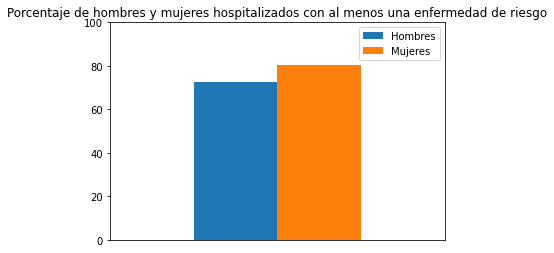

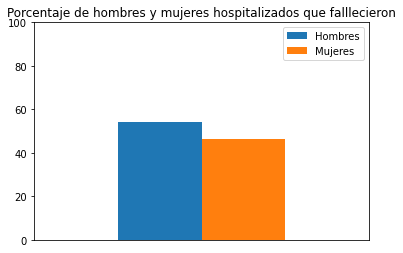

72.60845383759732 80.1765105227427
53.95% de los hombres hospitalizados fallecieron
46.27% de las mujeres hospitalizadas fallecieron


In [7]:
#hombres y mujeres hospitalizados
dfHH=dfhombres[dfhombres['TIPO_PACIENTE']==2]
dfMH=dfmujeres[dfmujeres['TIPO_PACIENTE']==2]

#hombres y mujeres hospitalizados que fallecieron
dfHHF=dfHH[dfHH['FECHA_DEF'].str.match("([2])\S+")== True]
dfMHF=dfMH[dfMH['FECHA_DEF'].str.match("([2])\S+")== True]

#hombres y mujeres hospitalizados con al menos una enfermedad de riesgo
dfHHC=dfHH[(dfHH['DIABETES']==1) | (dfHH['EPOC']==1) | (dfHH['ASMA']==1) | (dfHH['INMUSUPR']==1) | (dfHH['HIPERTENSION']==1) | (dfHH['OTRA_COM']==1) | (dfHH['CARDIOVASCULAR']==1) | (dfHH['OBESIDAD']==1) | (dfHH['TABAQUISMO']==1) | (dfHH['RENAL_CRONICA']==1)]
dfMHC=dfMH[(dfMH['DIABETES']==1) | (dfMH['EPOC']==1) | (dfMH['ASMA']==1) | (dfMH['INMUSUPR']==1) | (dfMH['HIPERTENSION']==1) | (dfMH['OTRA_COM']==1) | (dfMH['CARDIOVASCULAR']==1) | (dfMH['OBESIDAD']==1) | (dfMH['TABAQUISMO']==1) | (dfMH['RENAL_CRONICA']==1)]

#porcentaje de hombres y mujeres hospitalidos que falllecieron
porcentajeH=len(dfHHF)/len(dfHH)*100
porcentajeM=len(dfMHF)/len(dfMH)*100

##porcentaje de hombres y mujeres hospitalidos con almenos una enfermedad de riesgo
porcentajeHC=len(dfHHC)/len(dfHH)*100
porcentajeMC=len(dfMHC)/len(dfMH)*100

#gráficas 
x=["Hombres", "Mujeres"]
y=[porcentajeHC, porcentajeMC]

plt.ylim(0,100)
plt.xlim(1.25-1,1.25+1)
plt.xticks([])
plt.title("Porcentaje de hombres y mujeres hospitalizados con al menos una enfermedad de riesgo")
plt.bar(1,porcentajeHC,width=0.5, label="Hombres")
plt.bar(1.5,porcentajeMC,width=0.5, label="Mujeres")
plt.legend()
plt.show()


plt.ylim(0,100)
plt.xlim(1.25-1,1.25+1)
plt.xticks([])
plt.title("Porcentaje de hombres y mujeres hospitalizados que falllecieron")
plt.bar(1,porcentajeH,width=0.5, label="Hombres")
plt.bar(1.5,porcentajeM,width=0.5, label="Mujeres")
plt.legend()
plt.show()


print(porcentajeHC,porcentajeMC)
print("{:.2f}% de los hombres hospitalizados fallecieron".format(porcentajeH))
print("{:.2f}% de las mujeres hospitalizadas fallecieron".format(porcentajeM))


## Comparativa entre decesos en hospitales públicos y privados


In [5]:
dfprivados=df[df['SECTOR']==9]
dfpublicos=df[df['SECTOR']!=9]
print("Pacientes atendidos en hospitales","\nPrivados:",len(dfprivados),"|  Públicos",len(dfpublicos))

Pacientes atendidos en hospitales 
Privados: 1177 |  Públicos 63631


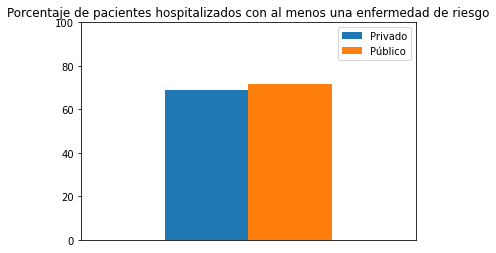

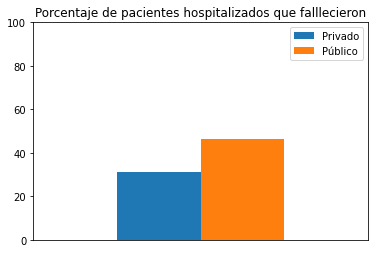

69.03% de los pacientes hospitalizados en servivios privados presentan cuando menos un factor de riesgo
71.69% de los pacientes hospitalizados en servivios públicos presentan cuando menos un factor de riesgo
30.97% de los pacinetes hospitalizados en servivios privados fallecieron
46.42% de las pacientes hospitalizadas en servicios públicos fallecieron


In [8]:
#pacientes hospitalizados en servicios público y privados
dfprivadosH=dfprivados[dfprivados['TIPO_PACIENTE']==2]
dfpublicosH=dfpublicos[dfpublicos['TIPO_PACIENTE']==2]

#pacientes hospitalizados que fallecieron en servivios publicos y privados
dfprivadosHF=dfprivadosH[dfprivadosH['FECHA_DEF'].str.match("([2])\S+")== True]
dfpublicosHF=dfpublicosH[dfpublicosH['FECHA_DEF'].str.match("([2])\S+")== True]

#pacientes hospitalizados que precentan cuando menos una enfermedad de riesgo
dfprivadosC=dfprivadosH[(dfprivadosH['DIABETES']==1) | (dfprivadosH['EPOC']==1) | (dfprivadosH['ASMA']==1) | (dfprivadosH['INMUSUPR']==1) | (dfprivadosH['HIPERTENSION']==1) | (dfprivadosH['OTRA_COM']==1) | (dfprivadosH['CARDIOVASCULAR']==1) | (dfprivadosH['OBESIDAD']==1) | (dfprivadosH['TABAQUISMO']==1) | (dfprivadosH['RENAL_CRONICA']==1)]
dfpublicosC=dfpublicosH[(dfpublicosH['DIABETES']==1) | (dfpublicosH['EPOC']==1) | (dfpublicosH['ASMA']==1) | (dfpublicosH['INMUSUPR']==1) | (dfpublicosH['HIPERTENSION']==1) | (dfpublicosH['OTRA_COM']==1) | (dfpublicosH['CARDIOVASCULAR']==1) | (dfpublicosH['OBESIDAD']==1) | (dfpublicosH['TABAQUISMO']==1) | (dfpublicosH['RENAL_CRONICA']==1)]

#porcentaje de muertes
porcentajePriv=len(dfprivadosHF)/len(dfprivadosH)*100
porcentajePubl=len(dfpublicosHF)/len(dfpublicosH)*100

#porcentaje de enfermedades de riesgo
porcentajePrivC=len(dfprivadosC)/len(dfprivadosH)*100
porcentajePublC=len(dfpublicosC)/len(dfpublicosH)*100

#graficas
plt.ylim(0,100)
plt.xlim(1.25-1,1.25+1)
plt.xticks([])
plt.title("Porcentaje de pacientes hospitalizados con al menos una enfermedad de riesgo")
plt.bar(1,porcentajePrivC,width=0.5, label="Privado")
plt.bar(1.5,porcentajePublC,width=0.5, label="Público")
plt.legend()
plt.show()



plt.ylim(0,100)
plt.xlim(1.25-1,1.25+1)
plt.xticks([])
plt.title("Porcentaje de pacientes hospitalizados que falllecieron")
plt.bar(1,porcentajePriv,width=0.5, label="Privado")
plt.bar(1.5,porcentajePubl,width=0.5, label="Público")
plt.legend()
plt.show()



print("{:.2f}% de los pacientes hospitalizados en servivios privados presentan cuando menos un factor de riesgo".format(porcentajePrivC))
print("{:.2f}% de los pacientes hospitalizados en servivios públicos presentan cuando menos un factor de riesgo".format(porcentajePublC))


print("{:.2f}% de los pacinetes hospitalizados en servivios privados fallecieron".format(porcentajePriv))
print("{:.2f}% de las pacientes hospitalizadas en servicios públicos fallecieron".format(porcentajePubl))
